In [2]:
print("hello, world!")

hello, world!


Simulating Historical Communication Networks in Python
------------------------------------------------------

In [9]:
%pip install --force-reinstall -v "mesa>=2.4.0,<3.0"

Using pip 25.0.1 from /usr/local/python/3.12.1/lib/python3.12/site-packages/pip (python 3.12)
  Obtaining dependency information for mesa<3.0,>=2.4.0 from https://files.pythonhosted.org/packages/19/91/d04f7b5562e6817ef2bf4327104ea934751982acf33521ff947bd63cdffe/mesa-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/7e/d4/7ebdbd03970677812aac39c869717059dbb71a4cfc033ca6e5221787892c/click-8.1.8-py3-none-any.whl.metadata
  Obtaining dependency information for cookiecutter from https://files.pythonhosted.org/packages/b6/d9/0137658a353168ffa9d0fc14b812d3834772040858ddd1cb6eeaf09f7a44/cookiecutter-2.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/63/23/c0615001f67ce7c96b3051d856baedc0c818a2ed84570b9bf9bde200f85d/matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for mesa-viz-t

In [3]:
import mesa

2.5.1 Setting up the model

In [8]:
class LetterAgent(mesa.Agent):
    """An agent with unique_id but no initial letters."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.letters_sent = 0
        self.letters_received = 0

class LetterModel(mesa.Model):
    """A model with N agents."""

    def __init__(self, N):
        super().__init__()
        self.num_agents = N
        # Create N agents
        for i in range(self.num_agents):
            a = LetterAgent(i, self)

2.5.2 Adding Time

In [9]:
class LetterAgent(mesa.Agent):
    """An agent with unique_id but no initial letters."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.letters_sent = 0
        self.letters_received = 0

    def step(self):
        # The agent's step will go here. 
        # For demonstration purposes we will print the agent's unique_id
        print("Hi, I am agent " + str(self.unique_id) + ".")

class LetterModel(mesa.Model):
    """A model with N agents."""

    def __init__(self, N):
        super().__init__()
        self.num_agents = N
        self.schedule = mesa.time.RandomActivation(self)
        # Create N agents
        for i in range(self.num_agents):
            a = LetterAgent(i, self)
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""
        self.schedule.step()

In [10]:
empty_model = LetterModel(10) # create a model with 10 agents
empty_model.step() # execute the step function once

Hi, I am agent 5.
Hi, I am agent 3.
Hi, I am agent 7.
Hi, I am agent 1.
Hi, I am agent 2.
Hi, I am agent 6.
Hi, I am agent 0.
Hi, I am agent 8.
Hi, I am agent 4.
Hi, I am agent 9.


2.5.3 Agent Step

In [11]:
class LetterAgent(mesa.Agent):
    """An agent with no initial letters."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.letters_sent = 0
        self.letters_received = 0

    def step(self):
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.letters_received += 1
        self.letters_sent += 1

2.5.4 Running your First Model

In [12]:
model = LetterModel(10)
for i in range(20):
    model.step()

In [5]:
import matplotlib.pyplot as plt

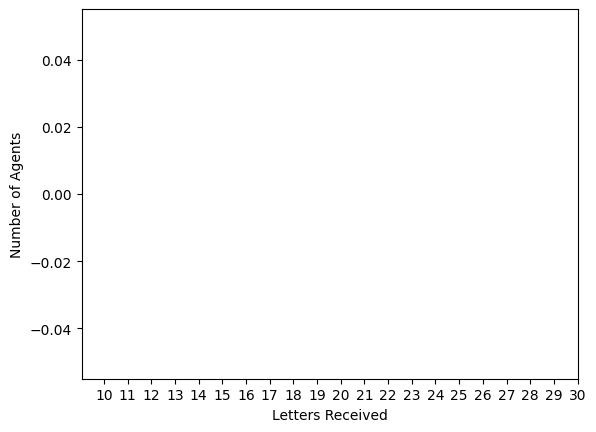

In [23]:
agent_letters_recd = [b.letters_received for b in model.schedule.agents]
plt.hist(agent_letters_recd, bins=range(10,30))
plt.xticks(range(10,31))
plt.xlabel("Letters Received")
plt.ylabel("Number of Agents")

plt.show()

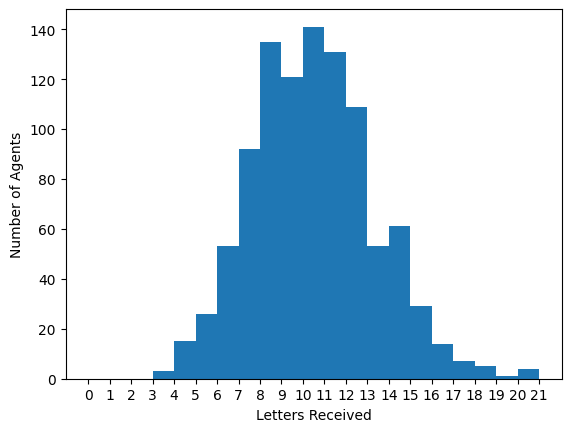

In [14]:
all_letters_rec = []

# This runs the model with 10 agents 100 times, each model executing 10 steps. 
for j in range(100):
    # Run the model
    model = LetterModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_letters_rec.append(agent.letters_received)

plt.hist(all_letters_rec, bins=range(max(all_letters_rec) + 1))
plt.xticks(range(max(all_letters_rec)+1))
plt.xlabel("Letters Received")
plt.ylabel("Number of Agents")

plt.show()

2.5.5 Adding Space

In [15]:
class LetterModel(mesa.Model):
    """A model with N agents."""

    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        self.grid = mesa.space.MultiGrid(width, height, True)
        self.schedule = mesa.time.RandomActivation(self)

        # Create N agents
        for i in range(self.num_agents):
            a = LetterAgent(i, self)
            self.schedule.add(a)

            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        """Advance the model by one step."""
        self.schedule.step()

In [16]:
class LetterAgent(mesa.Agent):
    """An agent with letters sent and received.
    
    The agent can move to agents in other grid cells 
    and send letters to agents in the same grid cell.
    """

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.letters_sent = 0
        self.letters_received = 0

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def send_letter(self):
        cellmates = [a for a in self.model.grid.get_cell_list_contents([self.pos]) if a != self]
        if len(cellmates) > 1:
            other_agent = self.random.choice(cellmates)
            other_agent.letters_received += 1
            self.letters_sent += 1

    def step(self):
        self.move()
        self.send_letter()

In [19]:
model = LetterModel(50, 10, 10)
for i in range(20):
    model.step()

In [4]:
import numpy as np

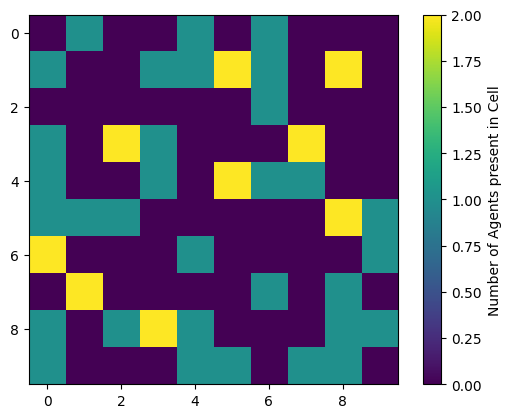

In [21]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, coord = cell
    x, y = coord
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation="nearest")
plt.colorbar(label="Number of Agents present in Cell")

2.5.6 Collecting Data

In [14]:
def compute_received_letters(model):
    number_of_received_letters = 0
    for agent in model.schedule.agents:
        return number_of_received_letters

In [28]:
class LetterModel(mesa.Model):
    """A model with a certain number of agents."""

    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        self.grid = mesa.space.MultiGrid(width, height, True)
        self.schedule = mesa.time.RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = LetterAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        self.datacollector = mesa.DataCollector(
            agent_reporters={
                "Letters_sent": "letters_sent",
                "Letters_received": "letters_received"
            }, 
            model_reporters={"All letters":compute_received_letters}
        )

    def step(self):
        self.schedule.step()
        self.datacollector.collect(self)

In [29]:
model = LetterModel(50, 10, 10)
for i in range(100):
    model.step()

In [30]:
agent_letters = model.datacollector.get_agent_vars_dataframe()
agent_letters.tail()

Letters_sent  Letters_received
Step AgentID                                
100  9                  13                12
     14                 12                 8
     1                  12                 8
     12                  8                 6
     33                 18                 8

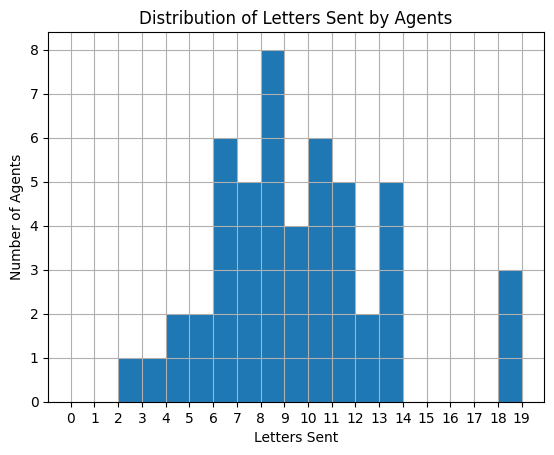

In [31]:
end_letters = agent_letters.xs(99, level="Step")["Letters_sent"]
bin_range = range(agent_letters.Letters_sent.max() + 1)
end_letters.hist(bins=bin_range)
plt.xticks(bin_range)
plt.xlabel("Letters Sent")
plt.ylabel("Number of Agents")
plt.title("Distribution of Letters Sent by Agents")
plt.show()

In [32]:
agent_letters.to_csv("agent_data.csv")

2.5.7 Visualization and Interactive Features of Mesa

In [15]:
def agent_portrayal(agent):
    color = "tab:blue"
    size = 5
    agents_letters = agent.letters_received
    if agents_letters > 5:
        size = agents_letters
    if agents_letters > 15:
        color = "tab:red"
    return {
        "color": color, "size": size,
    }

In [16]:
class LetterAgent(mesa.Agent):
    """An agent with letters sent and received."""

    def __init__(self, unique_id, model, reinforce=False):
        super().__init__(unique_id, model)
        self.letters_sent = 0
        self.letters_received = 0
        self.reinforce = reinforce

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        if self.random.choices([0,1], weights=[0.8,0.2], k=1)[0] == 1:
            new_position = self.random.choice(possible_steps)
            self.model.grid.move_agent(self, new_position)

    def send_letter(self):
        cellmates = [a for a in self.model.grid.get_cell_list_contents([self.pos]) if a != self]
        if len(cellmates) > 1:
            if self.reinforce == False:
                other_agent = self.random.choice(cellmates)
            else:
                weights = [x.letters_received for x in cellmates]
                if sum(weights) == 0:
                    weights = None
                other_agent = self.random.choices(
                    population=cellmates,
                    weights=weights,
                    k=1
                )[0]
            other_agent.letters_received += 1
            self.letters_sent += 1

    def step(self):
        self.move()
        self.send_letter()

class LetterModel(mesa.Model):
    """A model with a certain number of agents."""

    def __init__(self, N, width, height, reinforce=False):
        super().__init__()
        self.num_agents = N
        self.grid = mesa.space.MultiGrid(width, height, True)
        self.schedule = mesa.time.RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = LetterAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

        self.datacollector = mesa.DataCollector(
            agent_reporters={
                "Letters_sent": "letters_sent",
                "Letters_received": "letters_received"
            }, 
            model_reporters={"All letters":compute_received_letters}
        )

    def step(self):
        self.schedule.step()
        self.datacollector.collect(self)

In [17]:
model_params = {
    "N": {
        "type": "SliderInt",
        "value": 50,
        "label": "Amount of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    }, 
    "reinforce": {
        "type":"Select",
        "value": False,
        "values": [True, False]
    },
    "width": 10,
    "height": 10,
}

In [18]:
import solara
from matplotlib.figure import Figure

In [19]:
def make_histogram(model):
    fig = Figure()
    ax = fig.subplots()
    letter_vals = [agent.letters_received for agent in model.schedule.agents]
    ax.hist(letter_vals, bins=10)
    ax.set(
        xlabel="Letters received",
        ylabel="Number of agents",
        title="Distribution of Letters received by Agents"
    )

    solara.FigureMatplotlib(fig, format="png")

In [20]:
from mesa.experimental import JupyterViz

In [21]:
simulation = JupyterViz(
    LetterModel,
    model_params,
    measures=[make_histogram],
    name="LetterModel",
    agent_portrayal=agent_portrayal,
)

simulation

Cannot show ipywidgets in text